In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv("movies.csv", encoding="ISO-8859-1")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  2500 non-null   int64 
 1   title    2500 non-null   object
 2   genres   2500 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


In [4]:
movies.describe(include="all")

,movieId,title,genres
count,2500.000000,2500,2500
unique,NaN,2500,512
top,NaN,Toy Story (1995),Drama
freq,NaN,1,201
mean,10049.314400,NaN,NaN
std,20461.593085,NaN,NaN
min,1.000000,NaN,NaN
25%,1240.750000,NaN,NaN
50%,2693.500000,NaN,NaN
75%,5104.250000,NaN,NaN


In [5]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
genre_counts = Counter(genre for sublist in movies["genres"].str.split("|") for genre in sublist)
top_genres = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

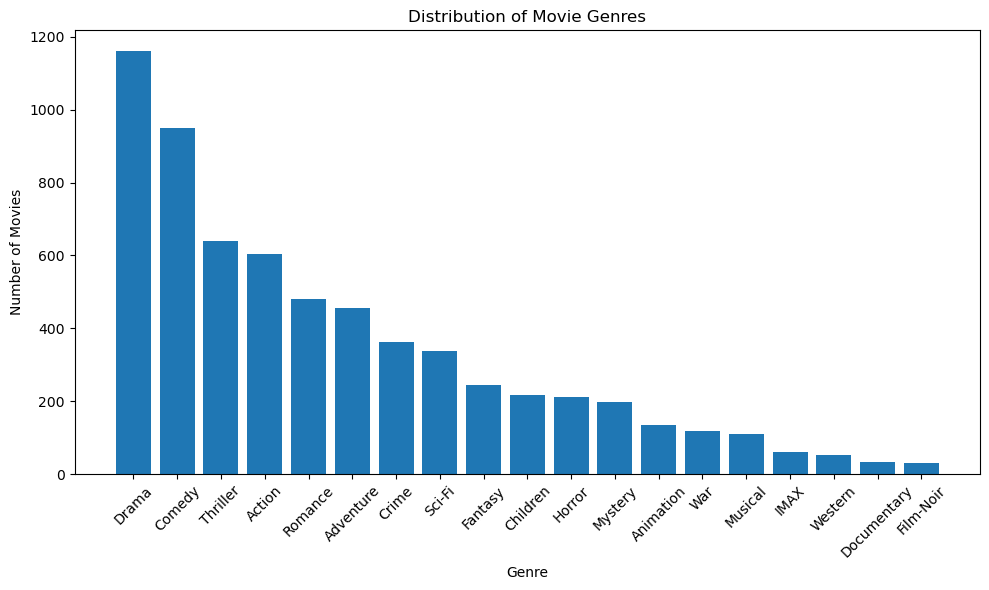

In [30]:
plt.figure(figsize=(10,6))
plt.bar(top_genres["Genre"], top_genres["Count"])
plt.title("Distribution of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
rating = pd.read_csv("rating.csv")
rating.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264505 entries, 0 to 264504
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     264505 non-null  int64  
 1   movieId    264505 non-null  int64  
 2   rating     264505 non-null  float64
 3   timestamp  264505 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 8.1 MB


In [9]:
rating.describe()

,userId,movieId,rating,timestamp
count,264505.000000,264505.000000,264505.000000,2.645050e+05
mean,68227.207225,11917.340326,3.504062,1.203784e+09
std,40855.031343,21615.562394,0.993534,1.136991e+08
min,316.000000,1.000000,0.500000,8.767674e+08
25%,33173.000000,1260.000000,3.000000,1.132967e+09
50%,66362.000000,2949.000000,3.500000,1.198263e+09
75%,103076.000000,6537.000000,4.000000,1.291971e+09
max,138200.000000,112852.000000,5.000000,1.427779e+09


In [10]:
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

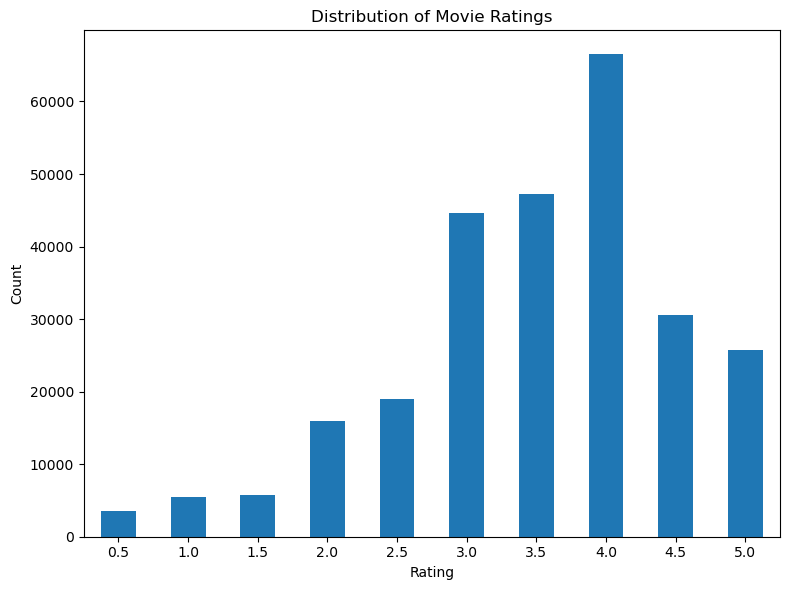

In [34]:
plt.figure(figsize=(8,6))
rating["rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
tags = pd.read_csv("tags.csv", encoding="ISO-8859-1")
tags.head()

,movieId,userId,tag,timestamp
0,3916,12882,sports,1147195545
1,4085,12882,Eddie Murphy,1147195966
2,33660,12882,boxing,1147195514
3,1197,320,must show,1145964801
4,1396,320,must show,1145964810


In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94875 entries, 0 to 94874
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movieId    94875 non-null  int64 
 1   userId     94875 non-null  int64 
 2   tag        94875 non-null  object
 3   timestamp  94875 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ MB


In [13]:
tags.describe()

,movieId,userId,timestamp
count,94875.000000,94875.000000,9.487500e+04
mean,17390.890825,69476.217223,1.272935e+09
std,27062.756810,42417.357502,7.897423e+07
min,1.000000,316.000000,1.136772e+09
25%,1287.000000,27898.000000,1.212238e+09
50%,3421.000000,68558.000000,1.270549e+09
75%,26776.000000,107711.000000,1.334368e+09
max,112852.000000,138200.000000,1.427746e+09


In [14]:
tags.isnull().sum()

movieId      0
userId       0
tag          0
timestamp    0
dtype: int64

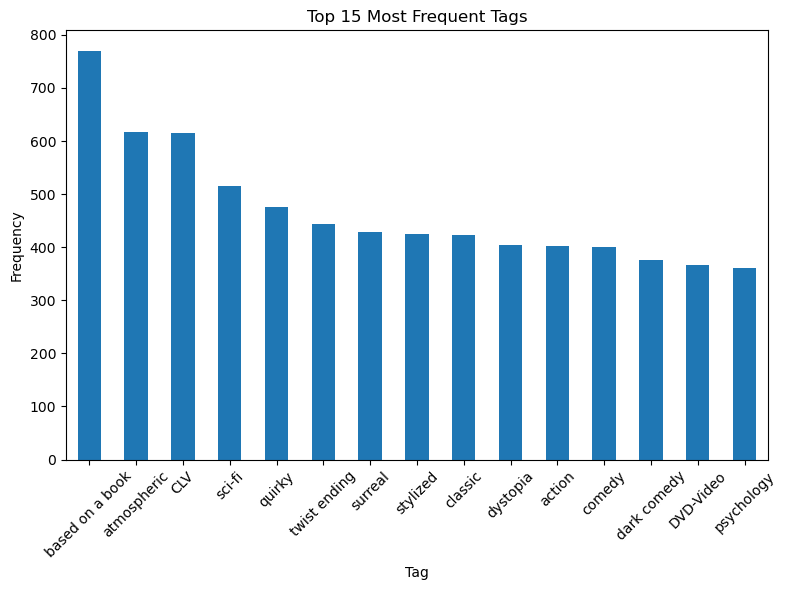

In [38]:
plt.figure(figsize=(8,6))
tags["tag"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Most Frequent Tags")
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()